In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./owid-covid-data.csv')
df = df[df['location'] == 'Russia']
df['date'] = pd.to_datetime(df['date'])

In [3]:
start_date = pd.Timestamp(2020, 3, 3)
end_date = start_date + pd.Timedelta(days=50)

In [4]:
start_date + pd.Timedelta(days=50)

Timestamp('2020-04-22 00:00:00')

In [5]:
sliced_df = df.loc[
    (df['date'] >= start_date) &
    (df['date'] < end_date)].reset_index(drop=True)

In [6]:
sliced_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
1,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
4,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
5,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
6,RUS,Europe,Russia,2020-03-09,17.0,0.0,2.000,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
7,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
8,RUS,Europe,Russia,2020-03-11,20.0,0.0,2.429,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
9,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [7]:
target_columns = ['total_cases', 'new_cases']
targets = sliced_df[target_columns]

In [8]:
targets.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
total_cases,3.0,3.0,4.0,13.0,13.0,17.0,17.0,20.0,20.0,28.0,...,15770.0,18328.0,21102.0,24490.0,27938.0,32008.0,36793.0,42853.0,47121.0,52763.0
new_cases,0.0,0.0,1.0,9.0,0.0,4.0,0.0,3.0,0.0,8.0,...,2186.0,2558.0,2774.0,3388.0,3448.0,4070.0,4785.0,6060.0,4268.0,5642.0


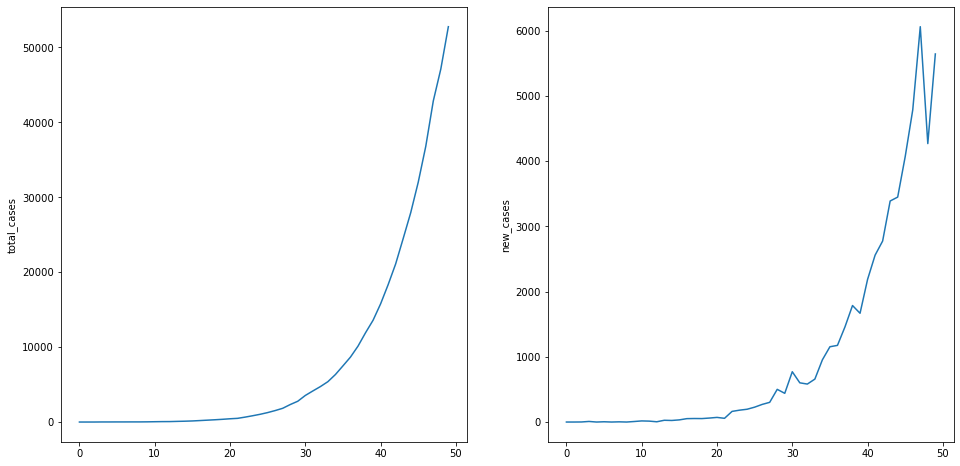

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

for i in range(len(axes)):
    sns.lineplot(data=sliced_df, x=sliced_df.index, y=target_columns[i], ax=axes[i])

In [10]:
sliced_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
1,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
4,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [11]:
X = sliced_df['date'].index.to_numpy().reshape(-1, 1)

mask = (sliced_df['new_cases'] == 0)
y = sliced_df[target_columns]
y.loc[mask, 'new_cases'] = 1

/tmp/ipykernel_280/3844805623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[mask, 'new_cases'] = 1


$$
    y \sim exp(w^Tx) \leftrightarrow \log y \sim w^Tx
$$

In [12]:
y = np.log(y)

In [13]:
model_total = LinearRegression()
model_new = LinearRegression()

In [14]:
total_cases, new_cases = y[target_columns[0]], y[target_columns[1]]

In [15]:
model_total.fit(X, total_cases)
model_new.fit(X, new_cases)

LinearRegression()

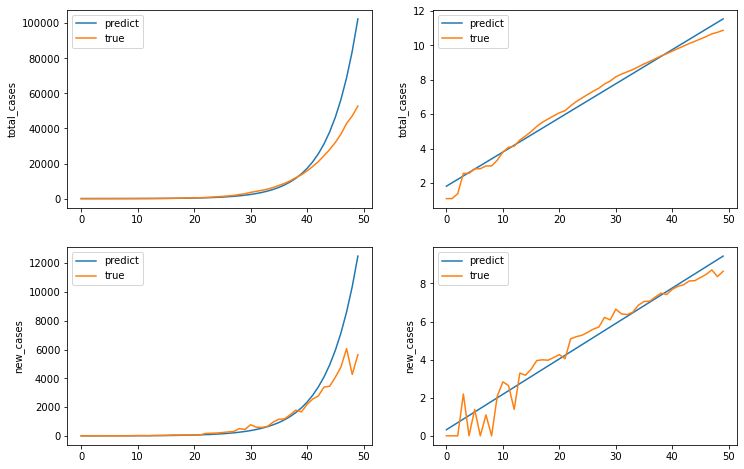

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

x = X.reshape(-1)
for axes_row, case_type, model in zip(axes, target_columns, [model_total, model_new]):   
    model_pred = model.predict(X)
    sns.lineplot(x=x, y=np.exp(model_pred), ax=axes_row[0], label='predict')
    sns.lineplot(x=x, y=np.exp(y[case_type]), ax=axes_row[0], label='true')
    sns.lineplot(x=x, y=model_pred, ax=axes_row[1], label='predict')
    sns.lineplot(x=x, y=y[case_type], ax=axes_row[1], label='true')

### Posterior

Будем считать, что

$$
    p(w) \sim \mathcal{N}(0, \sigma I)
$$

Шум оценим с помощью предсказанной прямой из предыдущего этапа.

In [17]:
prediction_total = model_total.predict(X)
std = np.sqrt(np.sum((prediction_total - total_cases) ** 2))

In [18]:
X = np.hstack((X, np.ones_like(X)))

In [19]:
X[:5]

array([[0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1]])

In [20]:
mu_prior = np.array([0, 0])
cov_prior = np.eye(2) * std

mu_prior, cov_prior

(array([0, 0]),
 array([[2.46810111, 0.        ],
        [0.        , 2.46810111]]))

Вспомним, что

$$
    \mu = \Sigma (\Sigma_0^{-1}\mu_0 + \frac{1}{\sigma^2} X^T y) \\
    \Sigma^{-1} = \Sigma_0^{-1} + \frac{1}{\sigma^2} X^T X
$$

In [21]:
cov_posterior = np.linalg.inv(np.linalg.inv(cov_prior) + 1 / std ** 2 * X.T @ X)
mu_posterior = cov_posterior @ (np.linalg.inv(cov_prior) @ mu_prior + 1 / std ** 2 * X.T @ y)

In [22]:
mu_posterior

,total_cases,new_cases
0,0.207121,0.187487
1,1.528934,0.270028


In [23]:
cov_posterior

array([[ 0.00051506, -0.01202544],
       [-0.01202544,  0.39686373]])

<AxesSubplot:ylabel='total_cases'>

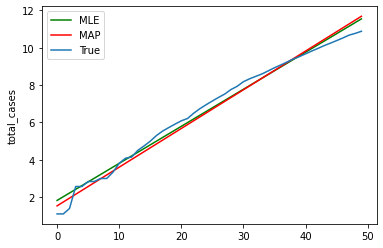

In [24]:
predictions = X @ mu_posterior

sns.lineplot(x=x, y=model_total.predict(X[:, 0].reshape(-1, 1)), label='MLE', color='g')
sns.lineplot(x=x, y=predictions['total_cases'], label='MAP', color='r')
sns.lineplot(x=x, y=total_cases, label='True')

<AxesSubplot:ylabel='new_cases'>

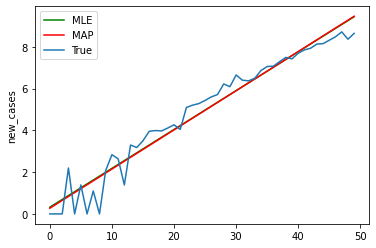

In [25]:
sns.lineplot(x=x, y=model_new.predict(X[:, 0].reshape(-1, 1)), label='MLE', color='g')
sns.lineplot(x=x, y=predictions['new_cases'], label='MAP', color='r')
sns.lineplot(x=x, y=new_cases, label='True')

### Sampling

In [26]:
samples = np.random.multivariate_normal(
    mean=mu_posterior['total_cases'],
    cov=cov_posterior,
    size=100
)
samples[:5]

array([[0.2030736 , 2.12300522],
       [0.23602619, 0.71263817],
       [0.21222884, 1.95135637],
       [0.21204032, 1.5566553 ],
       [0.20966015, 1.12303446]])

Text(0.5, 1.0, 'Log scale')

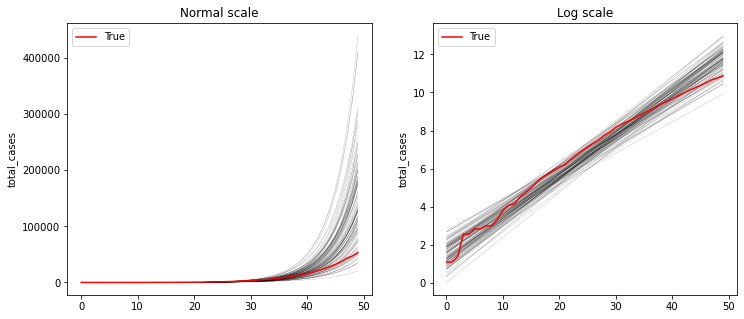

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

for sample in samples:
    sns.lineplot(x=x, y=np.exp(X @ sample), color='black', linewidth=0.1, ax=axes[0])
    sns.lineplot(x=x, y=X @ sample, color='black', linewidth=0.1, ax=axes[1])
    
sns.lineplot(x=x, y=np.exp(total_cases), color='red', label='True', ax=axes[0])
sns.lineplot(x=x, y=total_cases, color='red', label='True', ax=axes[1])
axes[0].set_title('Normal scale')
axes[1].set_title('Log scale')

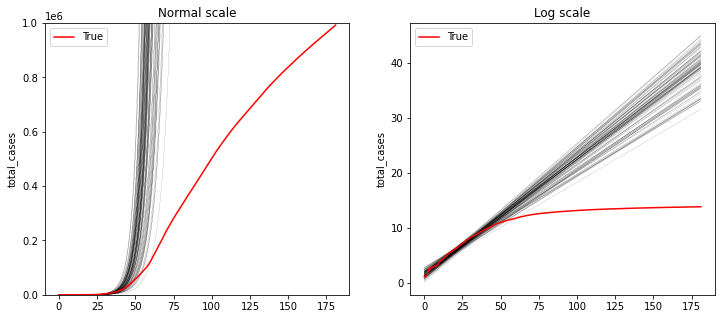

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))


end_time = pd.Timestamp(2020, 9, 1)
dt = (end_time - start_date).days
X_ = np.array([[i, 1] for i in range(dt)])
y = np.log(df[(start_date <= df['date']) & (df['date'] < end_time)]['total_cases'])
for sample in samples:
    sns.lineplot(x=range(dt), y=np.exp(X_ @ sample), color='black', linewidth=0.1, ax=axes[0])
    sns.lineplot(x=range(dt), y=X_ @ sample, color='black', linewidth=0.1, ax=axes[1])
    
sns.lineplot(x=range(dt), y=np.exp(y), color='red', label='True', ax=axes[0])
sns.lineplot(x=range(dt), y=y, color='red', label='True', ax=axes[1])
axes[0].set_title('Normal scale')
axes[0].set_ylim((0, 1e6))
axes[1].set_title('Log scale')
plt.show()

In [29]:
first_may = pd.Timestamp(2020, 5, 1)
first_june = pd.Timestamp(2020, 6, 1)
first_sept = pd.Timestamp(2020, 9, 1)

dates = [first_may, first_june, first_sept]

delta_may = (first_may - start_date).days
delta_june = (first_june - start_date).days
delta_september = (first_sept - start_date).days

X = np.array([
    [delta, 1] for delta in [delta_may, delta_june, delta_september]
])
y = df[df['date'].isin(dates)]['total_cases']

# print(X, samples)
y_pred = np.exp((X @ samples.T).mean(axis=1)).astype(int)
pd.DataFrame({'date': dates, 'prediction': y_pred, 'true': y})

,date,prediction,true
193253,2020-05-01,981668,114431.0
193284,2020-06-01,622549357,414328.0
193376,2020-09-01,128945696924121632,997072.0


И для ежедневно выявляемых случаев `new_cases`:

/home/ippk93/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


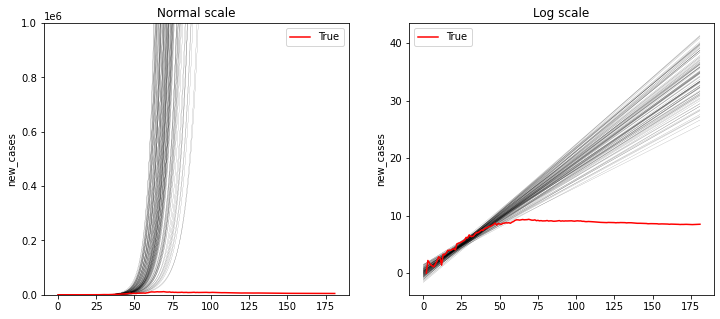

In [31]:
samples = np.random.multivariate_normal(
    mean=mu_posterior['new_cases'],
    cov=cov_posterior,
    size=100
)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))


end_time = pd.Timestamp(2020, 9, 1)
dt = (end_time - start_date).days
X_ = np.array([[i, 1] for i in range(dt)])
y = np.log(df[(start_date <= df['date']) & (df['date'] < end_time)]['new_cases'])
for sample in samples:
    sns.lineplot(x=range(dt), y=np.exp(X_ @ sample), color='black', linewidth=0.1, ax=axes[0])
    sns.lineplot(x=range(dt), y=X_ @ sample, color='black', linewidth=0.1, ax=axes[1])
    
sns.lineplot(x=range(dt), y=np.exp(y), color='red', label='True', ax=axes[0])
sns.lineplot(x=range(dt), y=y, color='red', label='True', ax=axes[1])
axes[0].set_title('Normal scale')
axes[0].set_ylim((0, 1e6))
axes[1].set_title('Log scale')
plt.show()

In [32]:
X = np.array([
    [delta, 1] for delta in [delta_may, delta_june, delta_september]
])
y = df[df['date'].isin(dates)]['new_cases']

# print(X, samples)
y_pred = np.exp((X @ samples.T).mean(axis=1)).astype(int)
pd.DataFrame({'date': dates, 'prediction': y_pred, 'true': y})

,date,prediction,true
193253,2020-05-01,85930,7933.0
193284,2020-06-01,31174593,8485.0
193376,2020-09-01,1230833081570725,4670.0


## Sigmoid

Можем заметить, что, если суммарное число заболевших в момент $x$
$$
    \Phi(x) = \int_{-\infty}^{x} \exp(\vec{w}^T \vec{t})dx
$$
, где $t = (x^2, x, 1)^T$, то 
$$
    \Phi'(x) = \exp(\vec{w}^T t)
$$ - скорость изменения числа заболевших, т.е. число новых случаев.

Тогда можем считать воспользоваться полиномиальной регрессией
$$
    \log(\Phi'(x)) = w_0 x^2 + w_1 x + w_2
$$

Сделаем это.

#### NOTE: отметим, что интеграл сверху, вообще говоря, определён не всегда - если коэффициент при старшей степени > 0 - интеграл разойдётся. Пусть это не наш случай, но это всё же стоит учитывать.

In [358]:
mask = (df['date'] >= start_date) & (df['date'] <= first_sept)
num_days = len(mask[mask == True])

df.loc[df['new_cases'] == 0, 'new_cases'] = 1

X = np.array([
    [date ** 2, date, 1] for date in range(num_days)
])
log_new_cases, total_cases = np.log(df['new_cases'][mask]), df['total_cases'][mask]
y = log_new_cases
y.shape, total_cases.shape, X.shape

((183,), (183,), (183, 3))

In [359]:
model_new = LinearRegression()

In [360]:
model_new.fit(X, log_new_cases)

LinearRegression()

<AxesSubplot:ylabel='new_cases'>

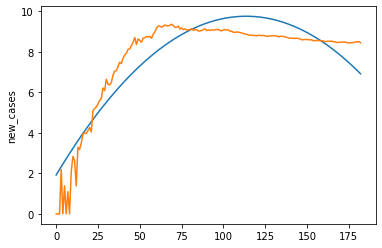

In [361]:
sns.lineplot(x=range(len(X)), y=model_new.predict(X))
sns.lineplot(x=range(len(X)), y=log_new_cases)

In [362]:
prediction_new = model_new.predict(X)
std = np.sqrt(np.sum((prediction_new - log_new_cases) ** 2))
prediction_new.shape

(183,)

In [368]:
mu_prior = np.array([0, 0, 0])
cov_prior = np.eye(3) * std

cov_posterior = np.linalg.inv(np.linalg.inv(cov_prior) + 1 / std ** 2 * X.T @ X)
mu_posterior = cov_posterior @ (np.linalg.inv(cov_prior) @ mu_prior + 1 / std ** 2 * X.T @ np.array(y))

mu_posterior, cov_posterior

(array([-6.78265269e-04,  1.53540975e-01,  1.20858961e+00]),
 array([[ 1.05086770e-07, -1.81290500e-05,  4.55704456e-04],
        [-1.81290500e-05,  3.37598275e-03, -9.98041113e-02],
        [ 4.55704456e-04, -9.98041113e-02,  4.55406078e+00]]))

(183,)


<AxesSubplot:ylabel='new_cases'>

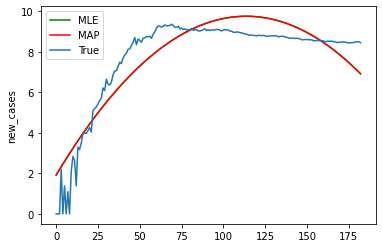

In [371]:
predictions = X @ mu_posterior
print(predictions.shape)

sns.lineplot(x=range(len(X)), y=model_new.predict(X), label='MLE', color='g')
sns.lineplot(x=range(len(X)), y=prediction_new, label='MAP', color='r')
sns.lineplot(x=range(len(X)), y=log_new_cases, label='True')

Вооружившись приростом числа заболевших, вычислить число заболевших к данному моменту становится просто - возьмём и сложим всех заболевших до нужного момента времени.

<AxesSubplot:title={'center':'New'}>

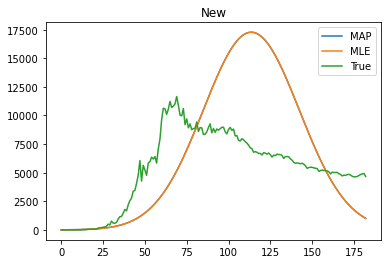

In [372]:
plt.title('New')
sns.lineplot(x=range(len(predictions)), y=np.array(np.exp(prediction_new)), label='MAP')
sns.lineplot(x=range(len(predictions)), y=np.exp(model_new.predict(X)), label='MLE')
sns.lineplot(x=range(len(predictions)), y=np.array((np.exp(log_new_cases))), label='True')

<AxesSubplot:title={'center':'Total'}>

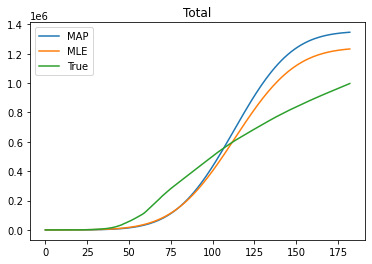

In [373]:
plt.title('Total')
sns.lineplot(x=range(len(predictions)), y=np.array(np.exp(predictions)).cumsum(), label='MAP')
sns.lineplot(x=range(len(predictions)), y=np.array(np.exp(model_new.predict(X))).cumsum(), label='MLE')
sns.lineplot(x=range(len(predictions)), y=np.array(np.exp(log_new_cases)).cumsum(), label='True')

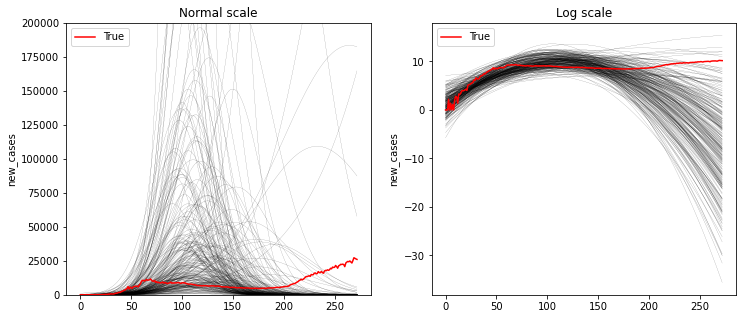

In [378]:
samples = np.random.multivariate_normal(
    mean=mu_posterior,
    cov=cov_posterior,
    size=250
)
samples = samples[samples[:, 0] < -1e-5]

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

end_time = pd.Timestamp(2020, 12, 1)
dt = (end_time - start_date).days
X = np.array([[i ** 2, i, 1] for i in range(dt)])
y = np.log(df[(start_date <= df['date']) & (df['date'] < end_time)]['new_cases'])
for sample in samples:
    sns.lineplot(x=range(dt), y=np.exp(X @ sample), color='black', linewidth=0.1, ax=axes[0])
    sns.lineplot(x=range(dt), y=X @ sample, color='black', linewidth=0.1, ax=axes[1])
    
sns.lineplot(x=range(dt), y=np.exp(y), color='red', label='True', ax=axes[0])
sns.lineplot(x=range(dt), y=y, color='red', label='True', ax=axes[1])
axes[0].set_title('Normal scale')
axes[0].set_ylim((0, 2e5))
axes[1].set_title('Log scale')
plt.show()

(0.0, 10000000.0)

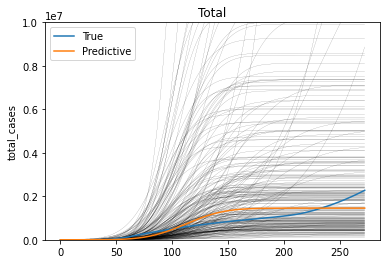

In [398]:
for sample in samples:
    sns.lineplot(x=range(len(y)), y=np.exp(X @ sample).cumsum(), color='black', linewidth=0.1)

avg_pred = (X @ samples.T).mean(axis=1)

plt.title('Total')
y = df[(start_date <= df['date']) & (df['date'] < end_time)]['total_cases']
sns.lineplot(x=range(len(y)), y=y, label='True')
sns.lineplot(x=range(len(y)), y=np.exp(avg_pred).cumsum(), label='Predictive')
plt.ylim((0, 1e7))

In [401]:
print("Предсказываемое количество заболевших в России:", int(np.sum(np.exp(avg_pred))))

Предсказываемое количество заболевших в России: 1455440


Построим оптимистичную и пессимистичную оценки

<AxesSubplot:ylabel='total_cases'>

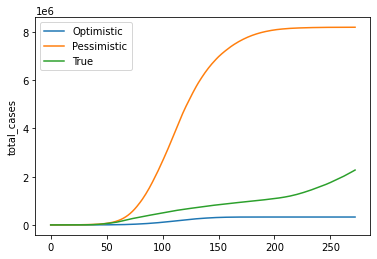

In [402]:
preds = (X @ samples.T)

optimistic = np.percentile(preds, 10, axis=1)
pessimistic = np.percentile(preds, 90, axis=1)

sns.lineplot(x=range(len(y)), y=np.exp(optimistic).cumsum(), label='Optimistic')
sns.lineplot(x=range(len(y)), y=np.exp(pessimistic).cumsum(), label='Pessimistic')
sns.lineplot(x=range(len(y)), y=y, label='True')

In [405]:
print("Оптимистичное количество заболевших в России:", np.sum(np.exp(optimistic)))
print("Пессимистичное количество заболевших в России:", np.sum(np.exp(pessimistic)))

Оптимистичное количество заболевших в России: 327384.4749299957
Пессимистичное количество заболевших в России: 8199005.673990836


### Выводы

Некоторые существенно нелинейные модели можно обучать с помощью линейной регрессии, если правильно проинтерпретировать данные. Конечно, чем дальше от обучаемой области мы уходим, тем меньше мы можем что-то сказать о том, что в таких областях происходит.

Экспоненциальная зависимость довольно неплохо предсказала происходящее в ближайшие ~50 дней, чуть дольше неплохо справляется сигмоидальная. Ни одна из них, к сожалению, не может предсказать сложное мультимодальное распределение количества заболевших со временем, модели не учитывают "волны". Для решения этой проблемы может помочь периодически переобучать модели, если после выхода на плато вдруг начинается резкий рост. По новой модели можно понять, нужно ли вводить карантин.